In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
print(x_train.shape)
# np.prod(x_train.shape[1:]) = 28*28 to flatten
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

2025-05-21 14:01:21.786517: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 14:01:21.788570: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 14:01:21.793761: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 14:01:21.832472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-21 14:01:21.949674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

(60000, 28, 28)


In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test))

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - loss: 0.3528 - val_loss: 0.1696
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.1594 - val_loss: 0.1349
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 0.1330 - val_loss: 0.1230
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.1225 - val_loss: 0.1162
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.1166 - val_loss: 0.1125
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1131 - val_loss: 0.1090
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.1093 - val_loss: 0.1058
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1068 - val_loss: 0.1035
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1043 - val_loss: 0.1021
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1030 - val_loss: 0.1009
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1019 - val_loss: 0.0996
Epoch 12/25
235/235 ━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


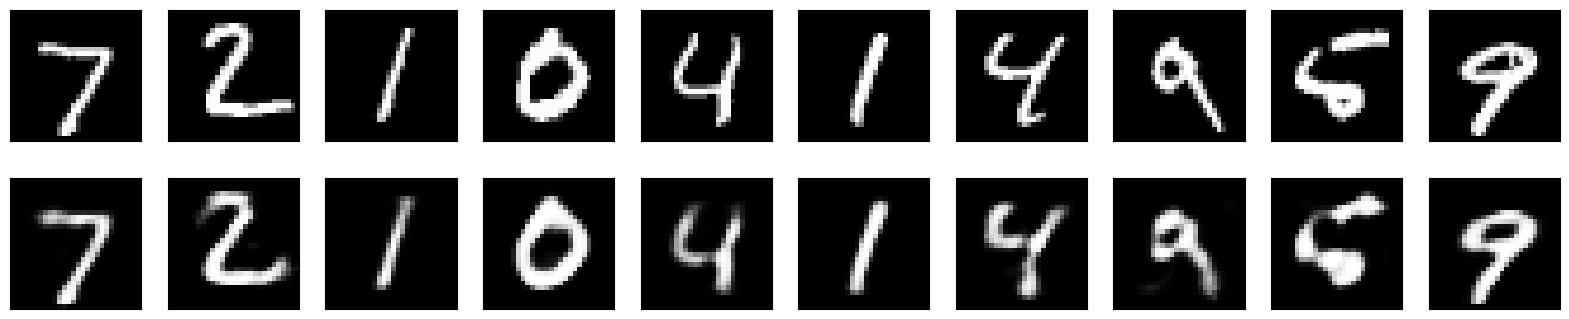

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


In [6]:
# Freeze all layers of the autoencoder
for layer in autoencoder.layers:
    layer.trainable = False

# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable = {layer.trainable}")

# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))

Layer 0: input_layer, Trainable = False
Layer 1: dense, Trainable = False
Layer 2: dense_1, Trainable = False
Layer 3: dense_2, Trainable = False
Layer 4: dense_3, Trainable = False
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - loss: 0.0938 - val_loss: 0.0916
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0922 - val_loss: 0.0913
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.0922 - val_loss: 0.0911
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.0919 - val_loss: 0.0911
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0918 - val_loss: 0.0910
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - loss: 0.0918 - val_loss: 0.0907
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.0914 - val_loss: 0.0907
Epoch 10/10
235/235 ━━━━━━━

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2091 - val_loss: 0.1441
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1419 - val_loss: 0.1335
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1330 - val_loss: 0.1285
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1288 - val_loss: 0.1261
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1266 - val_loss: 0.1245
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1253 - val_loss: 0.1239
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.1242 - val_loss: 0.1229
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1237 - val_loss: 0.1227
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1232 - val_loss: 0.1228
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.1230 - val_loss: 0.1217
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1223 - val_loss: 0.1216
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

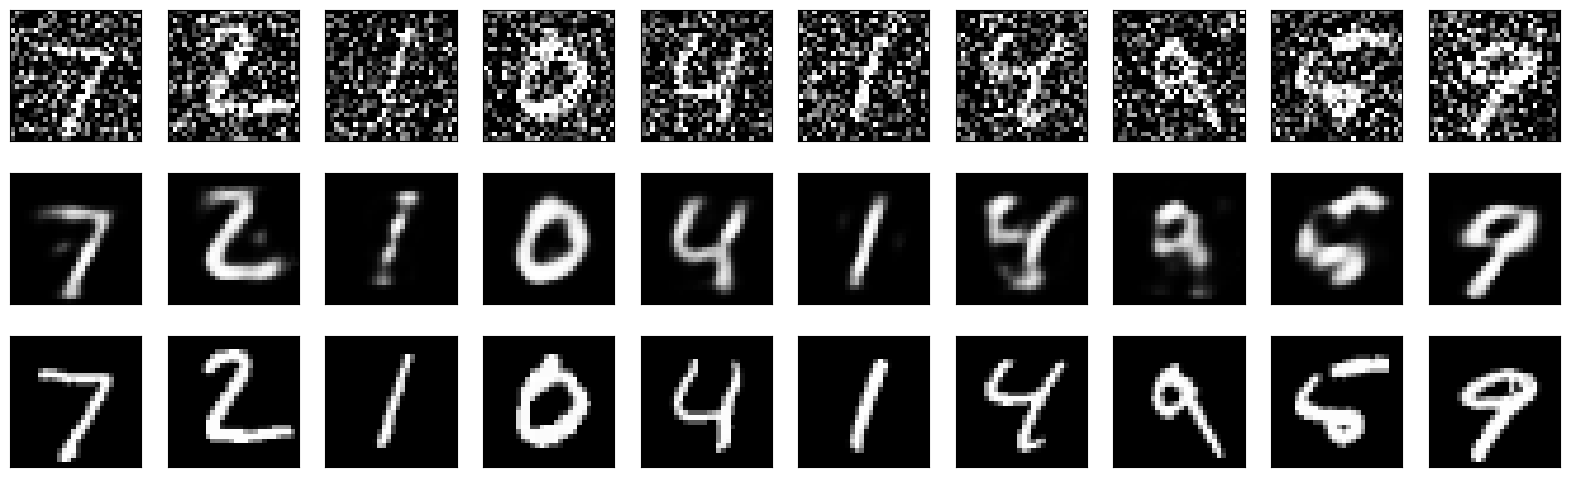

In [7]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [8]:
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.3598 - val_loss: 0.1781
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1712 - val_loss: 0.1510
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1480 - val_loss: 0.1363
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1358 - val_loss: 0.1294
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1299 - val_loss: 0.1262
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1269 - val_loss: 0.1239
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1250 - val_loss: 0.1224
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1236 - val_loss: 0.1211
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1221 - val_loss: 0.1200
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1214 - val_loss: 0.1192
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1204 - val_loss: 0.1182
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━

In [9]:
from tensorflow.keras.regularizers import l2 

# Encoder with L2 regularization 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer) 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded) 

# Decoder with L2 regularization 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model with L2 regularization 
autoencoder_regularized = Model(input_layer, output_layer) 
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model 
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

# Evaluate the model 
loss = autoencoder_regularized.evaluate(x_test, x_test) 
print(f'Regularized Autoencoder - Test loss: {loss}')

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 1.7672 - val_loss: 0.4425
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.4234 - val_loss: 0.3956
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.3923 - val_loss: 0.3791
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3760 - val_loss: 0.3640
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.3605 - val_loss: 0.3505
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3485 - val_loss: 0.3406
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3391 - val_loss: 0.3329
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.3312 - val_loss: 0.3257
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3249 - val_loss: 0.3199
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.3184 - val_loss: 0.3141
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.3130 - val_loss: 0.3093
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


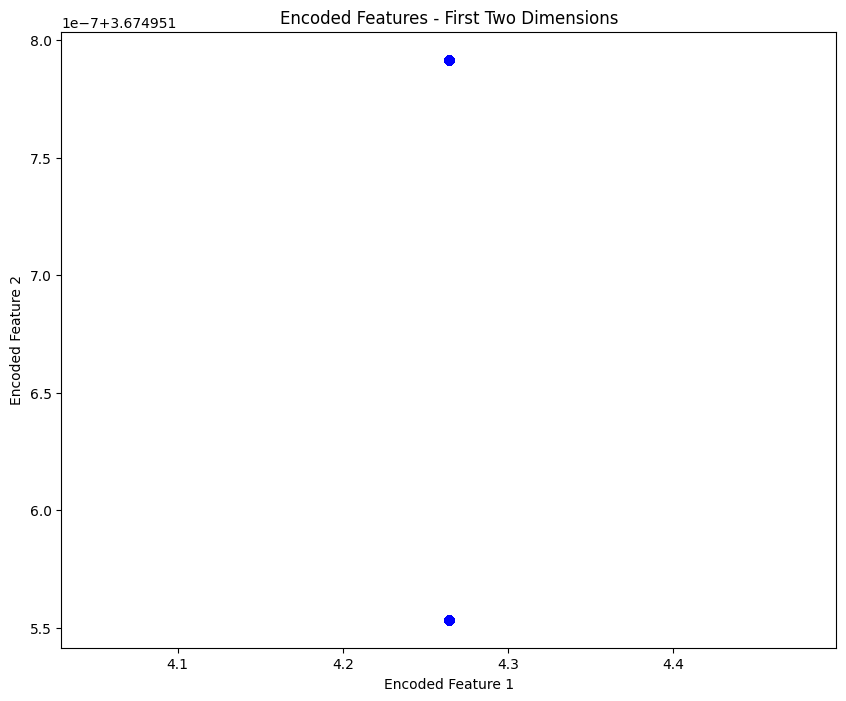

In [10]:
import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show()